In [1]:
%matplotlib inline

import timeit
from max_flow import Flow
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
from math import floor


In [22]:
from project_selection import ProjectSelection

t1_y = []
t2_y = []
t3_y = []

x = range(1,1000)

for m in x:
    def_aumento_m = "1\n" + str(m) + "\n1\n" 
    def_aumento_m_con_deps = "1\n" + str(m) + "\n1000\n"
    def_aumento_m_con_deps_costo = "1\n" + str(m) + "\n1000\n"
    for i in range(1,m+1):
        def_aumento_m += "1\n"
        def_aumento_m_con_deps += "1 1\n"
        def_aumento_m_con_deps_costo += "100 1\n"
    ps1 = ProjectSelection(def_aumento_m, solve = False)
    ps2 = ProjectSelection(def_aumento_m_con_deps, solve = False)
    ps3 = ProjectSelection(def_aumento_m_con_deps_costo, solve = False)
    
    t = timeit.Timer(partial(ps1.solve))
    t1_y.append((t.timeit(1)))
    t = timeit.Timer(partial(ps2.solve))
    t2_y.append((t.timeit(1)))
    t = timeit.Timer(partial(ps3.solve))
    t3_y.append((t.timeit(1)))

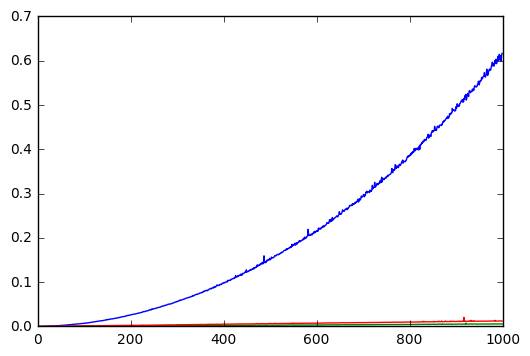

In [23]:
plt.plot(x,t1_y,'g')
plt.plot(x,t2_y,'b')
plt.plot(x,t3_y,'r')

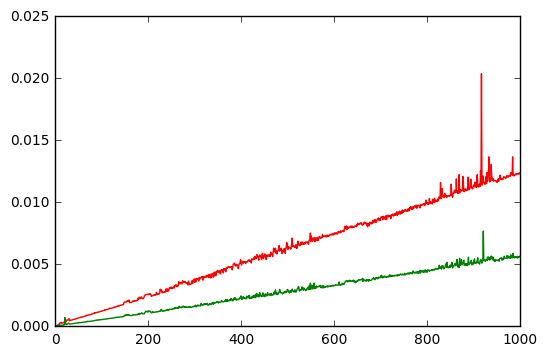

In [24]:
plt.plot(x,t3_y,'r')
plt.plot(x,t1_y,'g')